# Carry out PCA on discrete data

In [1]:
from pandas import read_csv
from prince import PCA
customer_churn = read_csv('../data/Customer_churn_discrete.csv', index_col="customerID")
labels = customer_churn['Churn']
customer_churn = customer_churn.drop(['Churn'], axis='columns')

## Encode categories

In [2]:
customer_churn_discrete = customer_churn.apply(lambda x: x.astype("category").cat.codes,axis=0)
customer_churn_discrete.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
customerID,,,,,,,,,,,,,,,,,,,
7590-VHVEG,0,0,1,0,0,0,1,0,0,2,0,0,0,0,0,1,2,0,0
5575-GNVDE,1,0,0,0,1,1,0,0,2,0,2,0,0,0,1,0,3,1,0
3668-QPYBK,1,0,0,0,0,1,0,0,2,2,0,0,0,0,0,1,3,1,0
7795-CFOCW,1,0,0,0,1,0,1,0,2,0,2,2,0,0,1,0,0,0,0
9237-HQITU,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,2,1,0


In [3]:
pca = PCA(n_components=5)
pca.fit(customer_churn_discrete)
pca.explained_inertia_

array([0.21070207, 0.12248259, 0.07889148, 0.06411039, 0.05652092])

In [4]:
from numpy import cumsum
cumsum(pca.explained_inertia_)

array([0.21070207, 0.33318466, 0.41207614, 0.47618654, 0.53270745])

In [5]:
from update import update_csv
update_csv("PCA",pca.explained_inertia_)

<AxesSubplot:title={'center':'Row principal coordinates'}, xlabel='Component 0 (21.07% inertia)', ylabel='Component 1 (12.25% inertia)'>

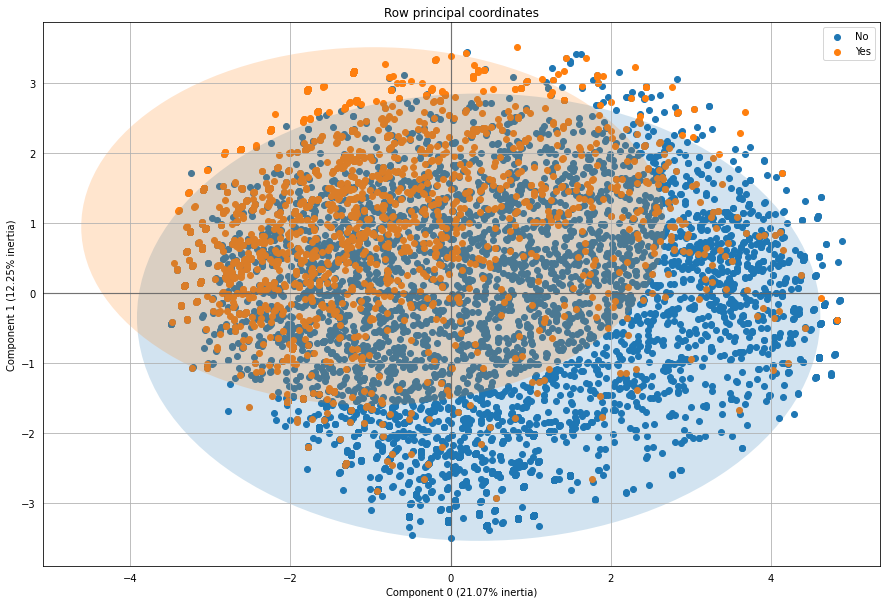

In [6]:
pca.plot_row_coordinates(customer_churn_discrete,figsize=(15, 10),color_labels=labels)